Columns used by the model:
 Index(['score', 'reviews', 'los', 'star_rating', 'location_rating',
       'Free_cancellation', 'Limited_rooms', 'TTT', 'Breakfast', 'index',
       'km_from_center', 'room_rate', 'LOS'],
      dtype='object')
Decision Tree Regressor Results:
   Depth  Train R2  Train RMSE    Train MSE  Train MAE   Test R2  Test RMSE  \
0      8  0.952060   87.502585  7656.702420  62.427736  0.950048  90.188878   
1     10  0.964492   75.306853  5671.122166  53.545777  0.957448  83.241096   
2     12  0.973140   65.496830  4289.834685  44.431385  0.958593  82.113970   
3     13  0.977486   59.964744  3595.770468  39.330233  0.957556  83.135907   
4     14  0.981318   54.624039  2983.785650  34.121051  0.956200  84.452619   

      Test MSE   Test MAE  
0  8134.033792  64.291310  
1  6929.080051  58.389428  
2  6742.704019  54.452709  
3  6911.579071  53.348363  
4  7132.244934  52.539704  


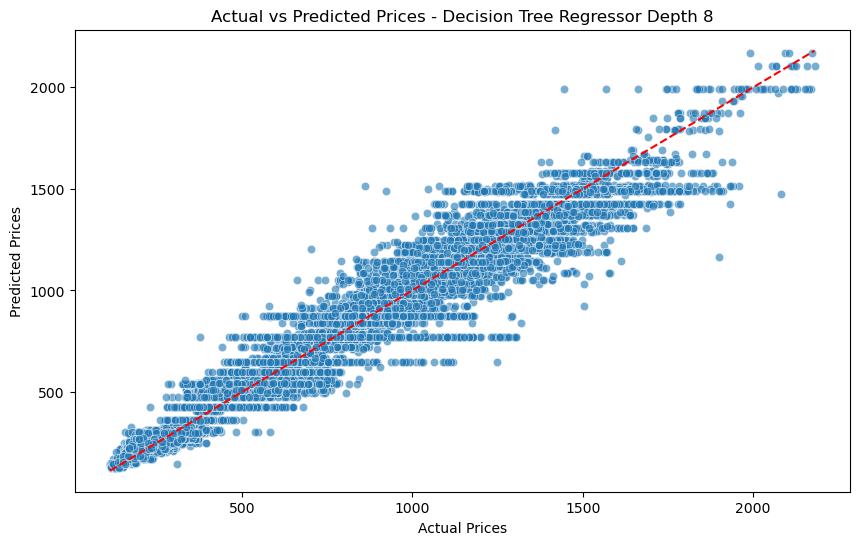

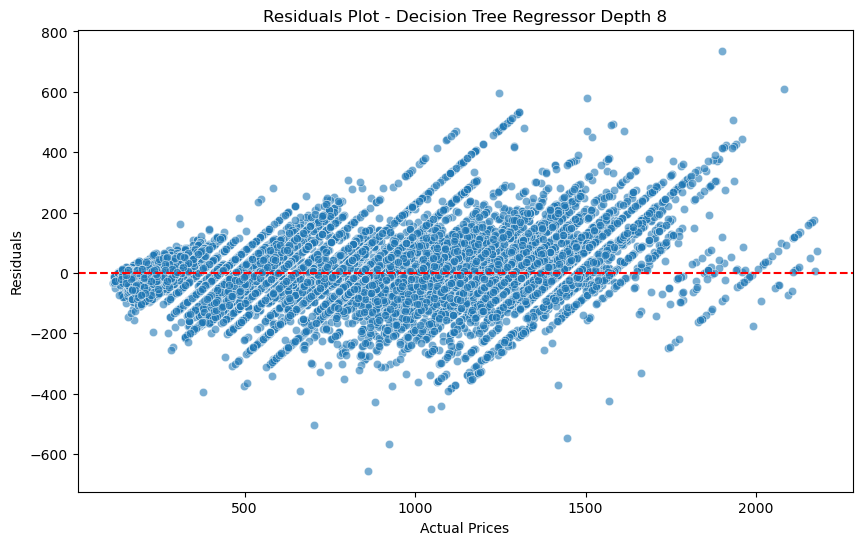

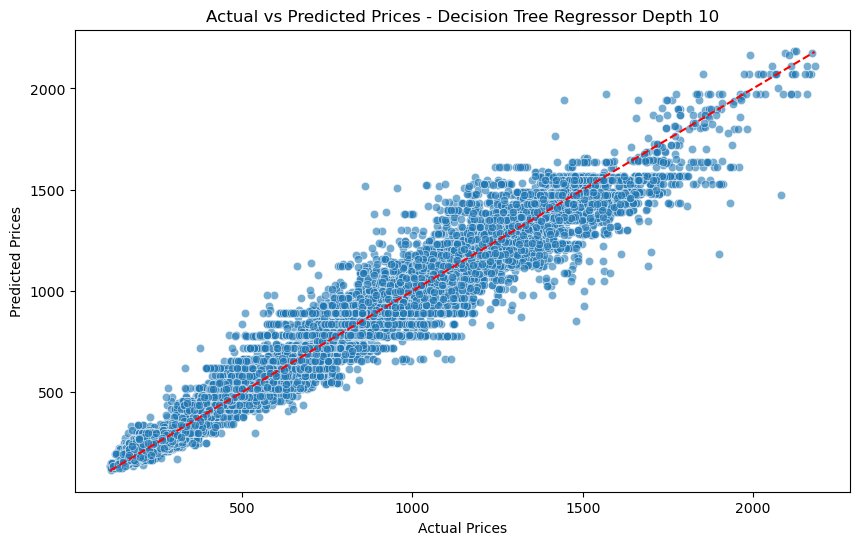

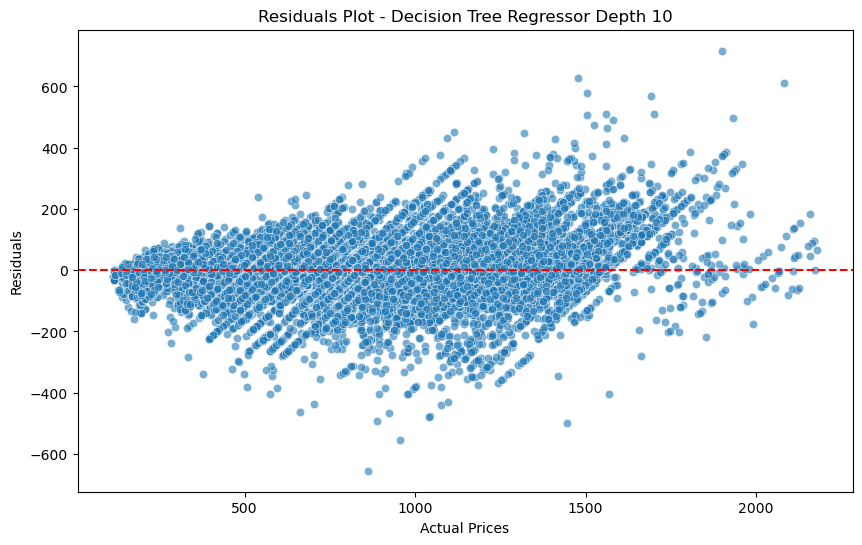

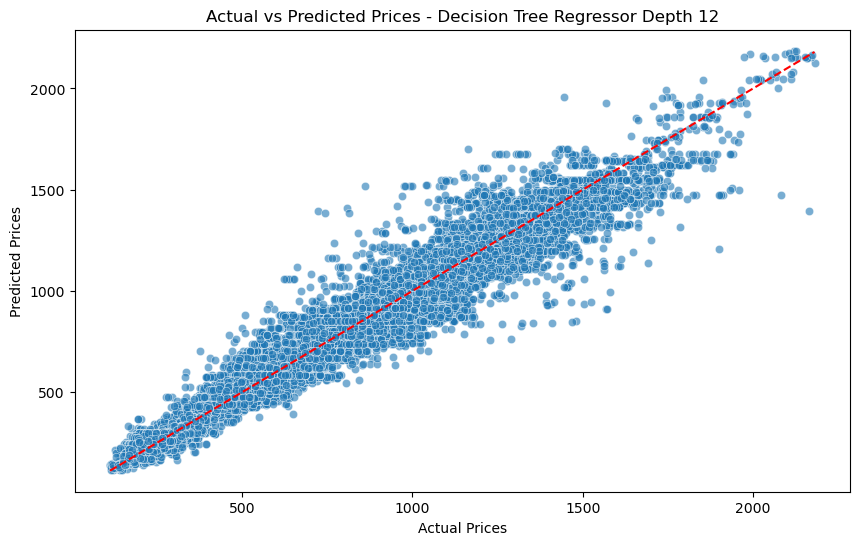

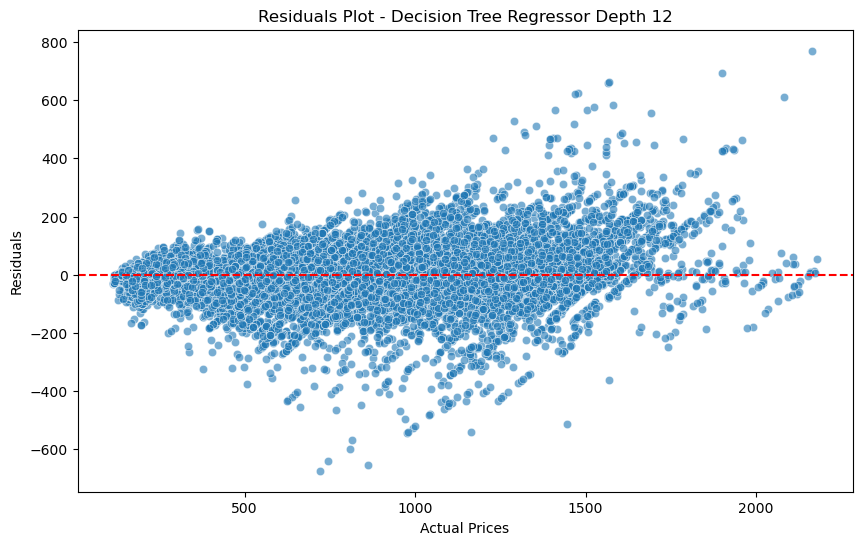

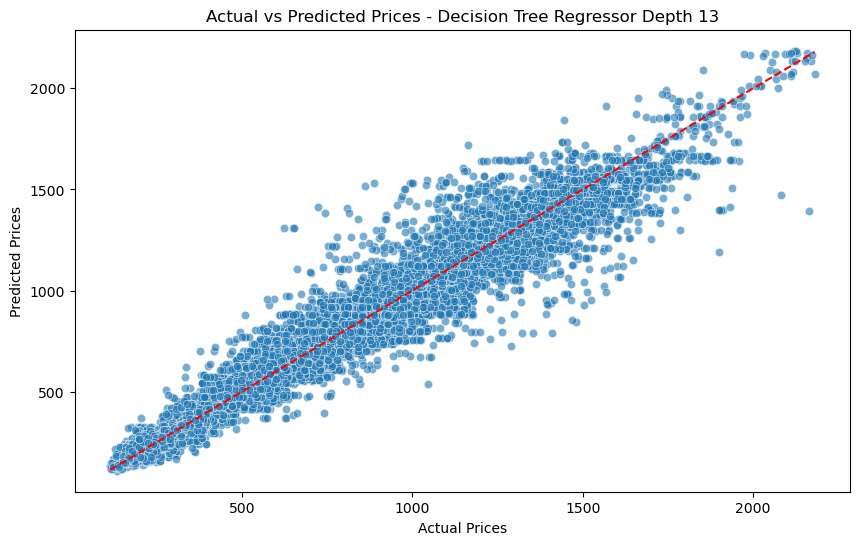

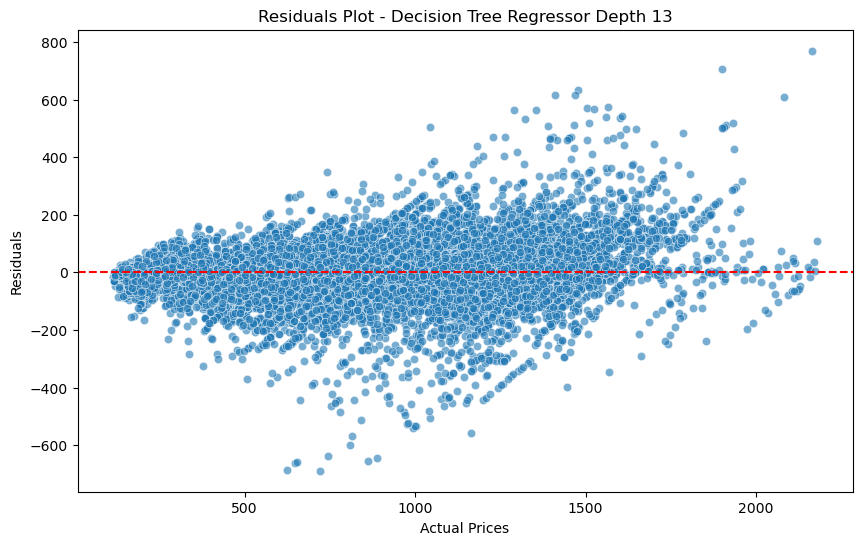

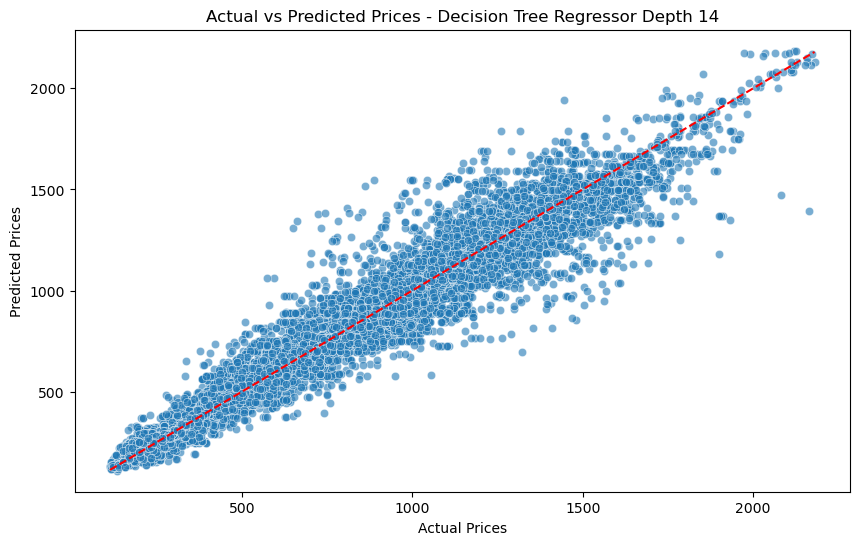

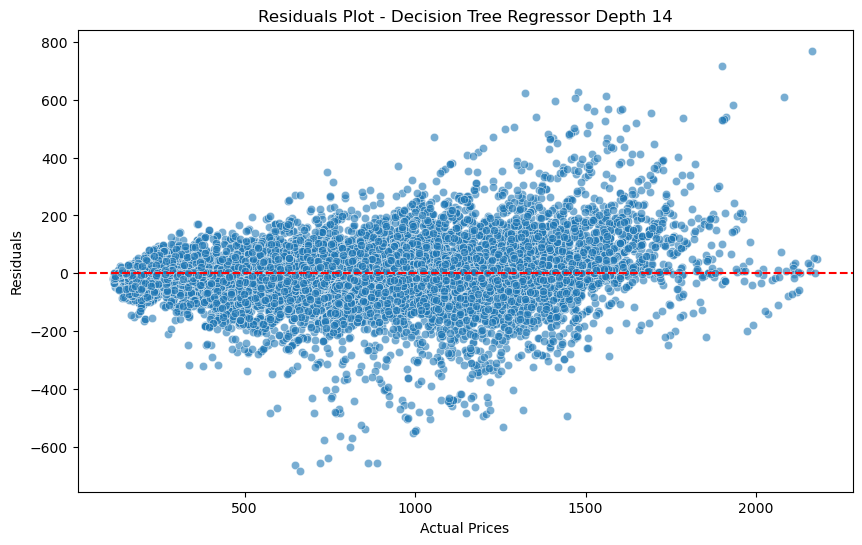

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# Load the data
df1 = pd.read_csv('./0507_cleaned_booking_hotels.csv')
df2 = pd.read_csv('./2506_cleaned_booking_hotels.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned.csv')


# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print all the columns that the model uses
print("Columns used by the model:\n", X.columns)

# Initialize models with different depths
depths = [8, 10, 12, 13, 14]
results = []
predictions = {}
feature_importance = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })

    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

    # For depth 12, store feature importance
    if depth == 12:
        feature_importance = model.feature_importances_

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot - Decision Tree Regressor {model_name}')
    plt.show()


## The attached code is a run of the Decision Tree Regressor model on booking data with additions of new features and after we have done one hot encoding for them (a period of the month - beginning, middle and end, day of the week of check in, day of the week of check out)

Columns used by the model:
 Index(['score', 'reviews', 'los', 'star_rating', 'location_rating',
       'Free_cancellation', 'Limited_rooms', 'TTT', 'Breakfast', 'index',
       'km_from_center', 'room_rate', 'checkin_day', 'checkout_day',
       'checkin_day_name_Friday', 'checkin_day_name_Monday',
       'checkin_day_name_Saturday', 'checkin_day_name_Sunday',
       'checkin_day_name_Thursday', 'checkin_day_name_Tuesday',
       'checkin_day_name_Wednesday', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'period_of_the_month_beginning of the month',
       'period_of_the_month_end of the month',
       'period_of_the_month_middle of the month', 'LOS'],
      dtype='object')
Decision Tree Regressor Results:
   Depth  Train R2  Train RMSE    Train MSE  Train MAE   Test R2  Test RMSE  \
0      8  0.969643 

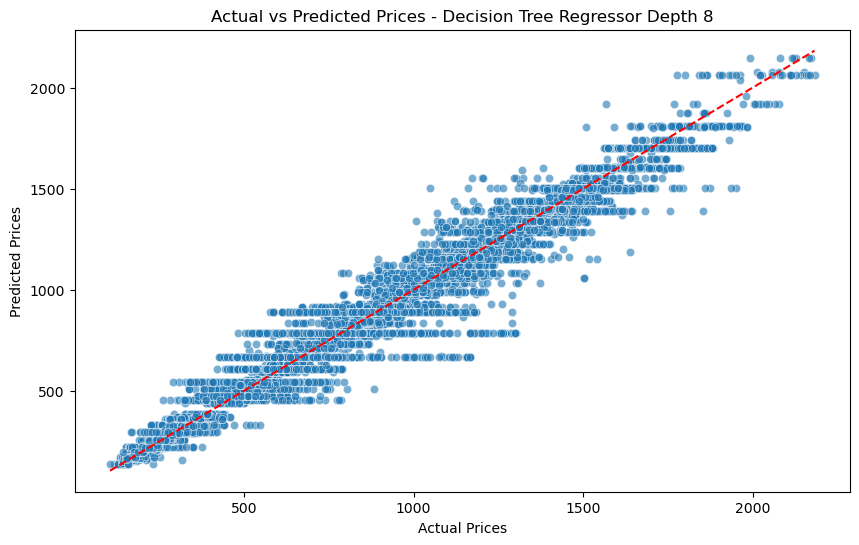

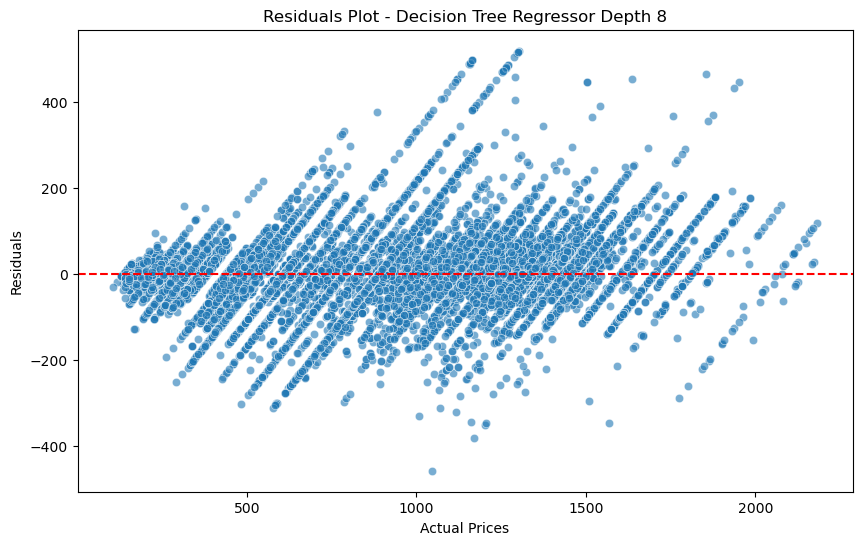

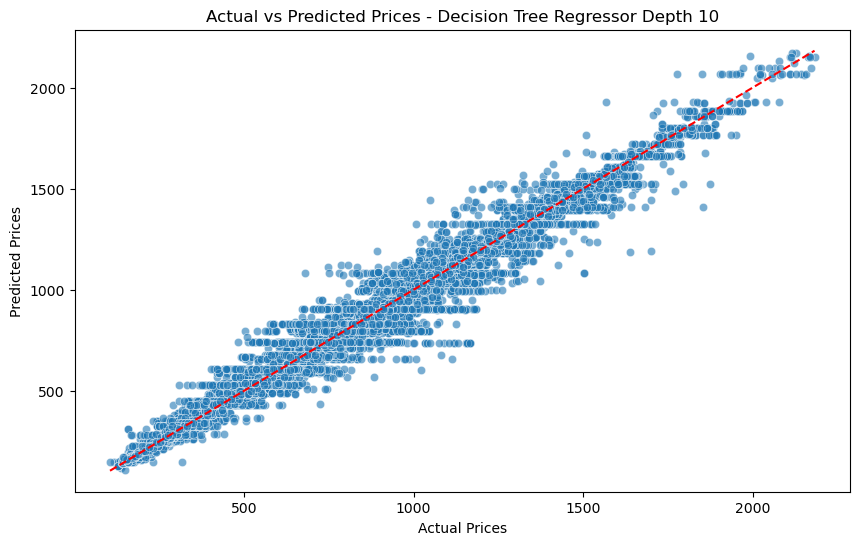

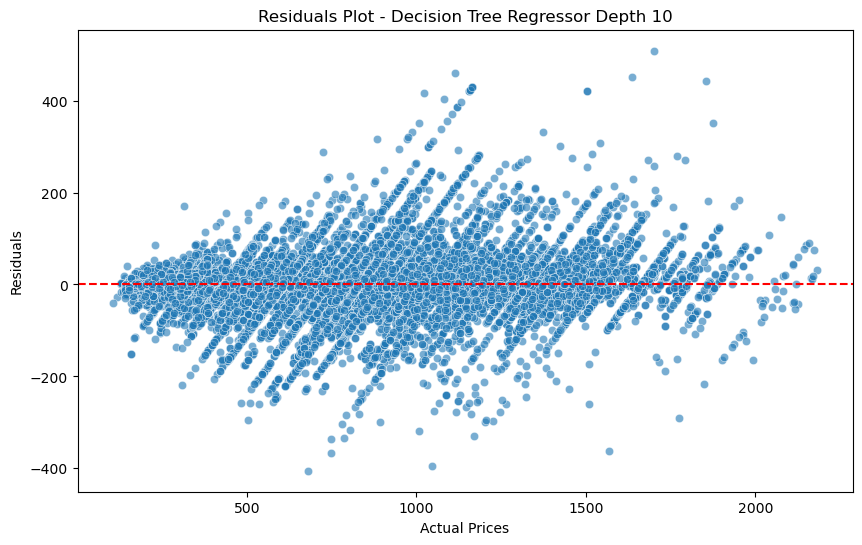

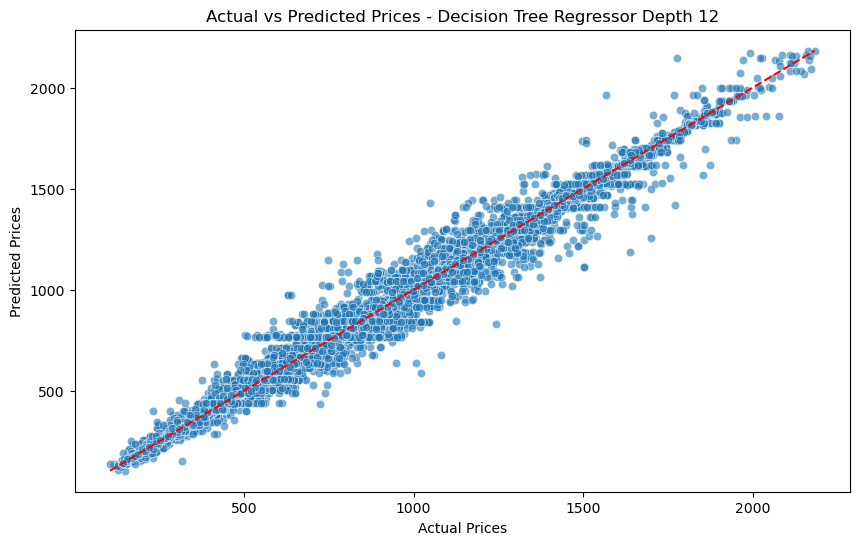

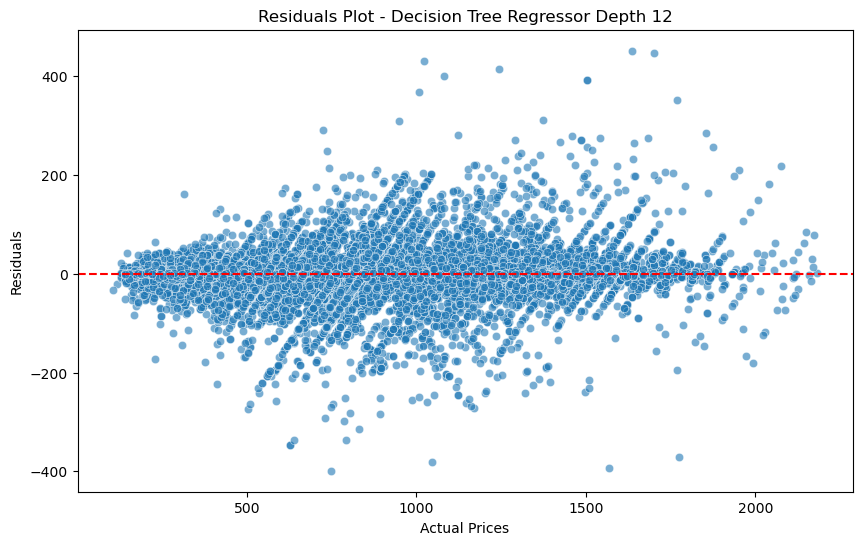

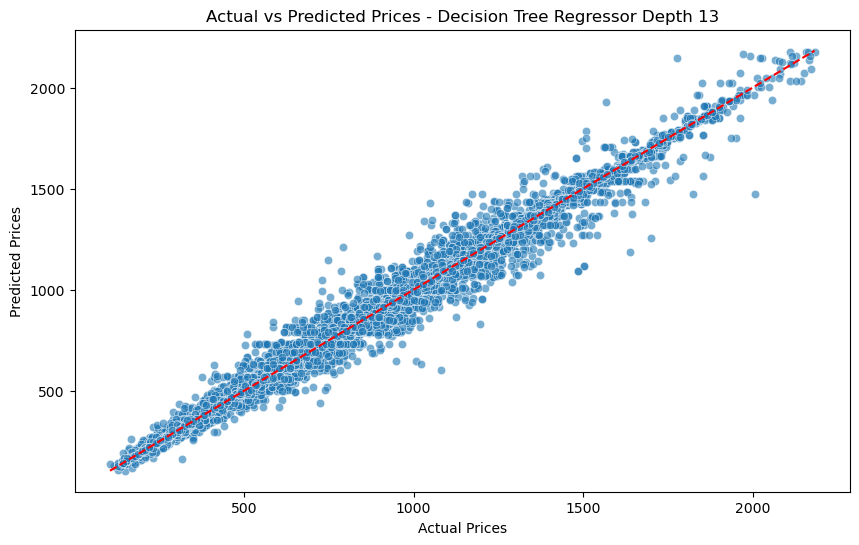

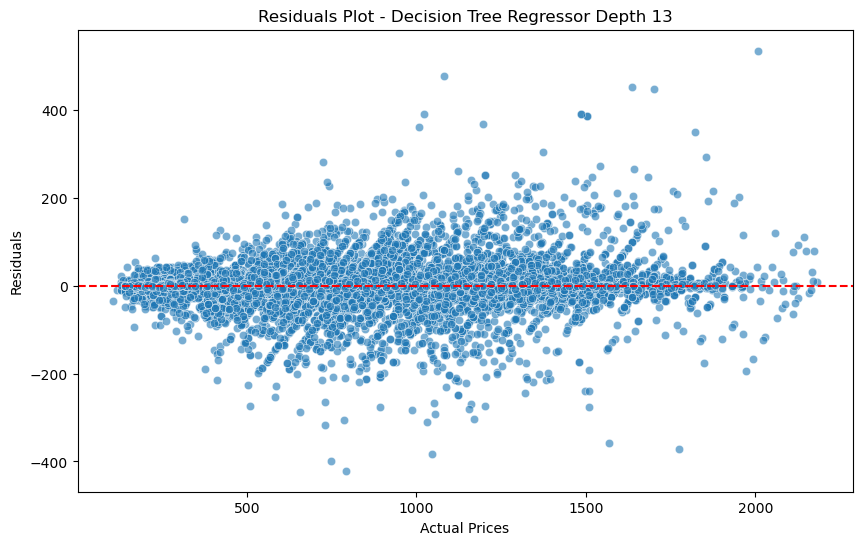

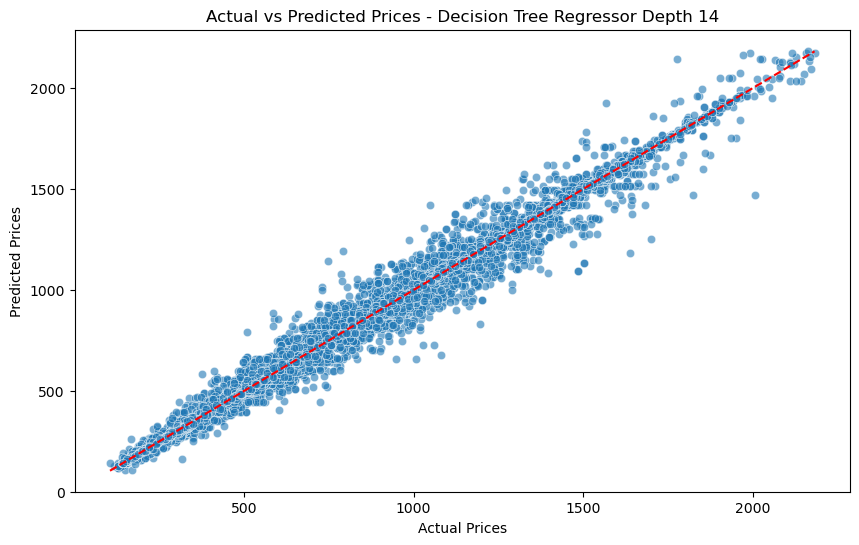

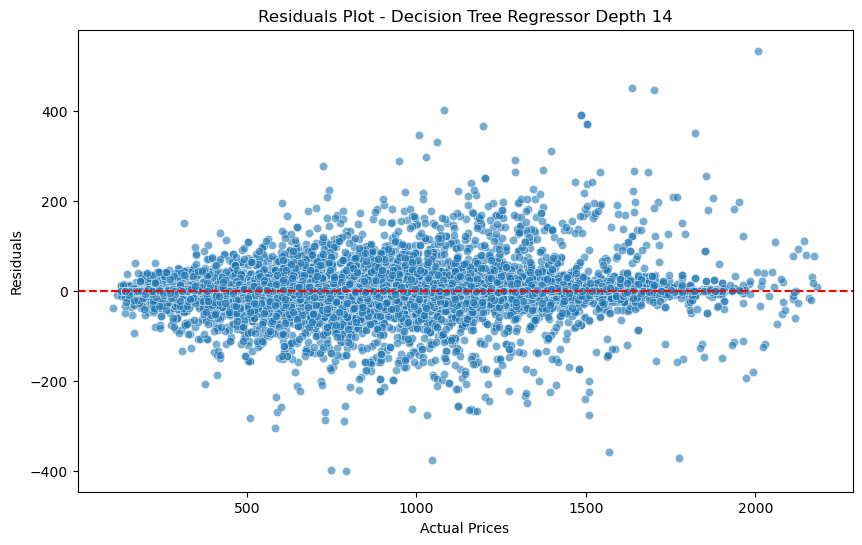

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


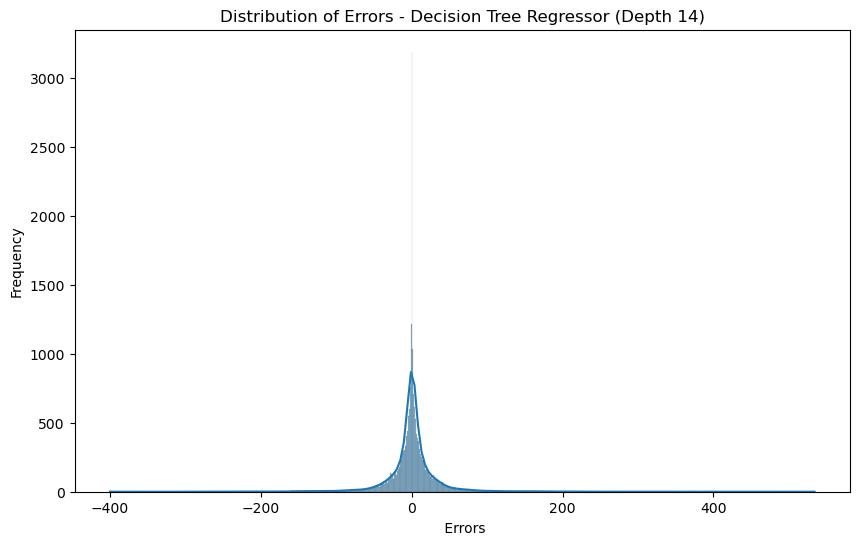

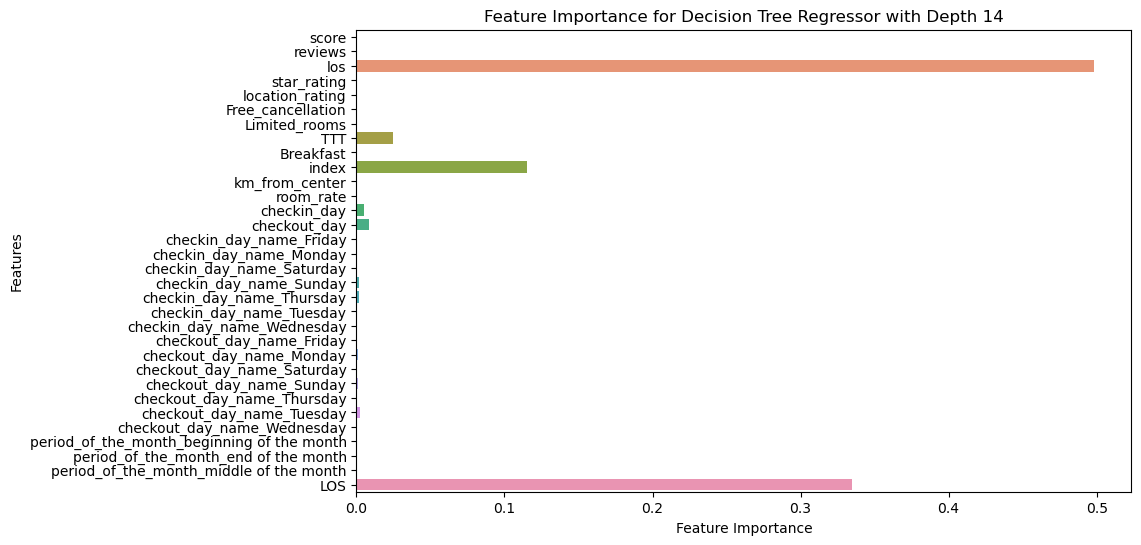

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# Load the data
df1 = pd.read_csv('./05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df2 = pd.read_csv('./25_06_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print all the columns that the model uses
print("Columns used by the model:\n", X.columns)

# Initialize models with different depths
depths = [8, 10, 12, 13, 14]
results = []
predictions = {}
feature_importance = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })

    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

    # For depth 12, store feature importance
    if depth == 12:
        feature_importance = model.feature_importances_

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot - Decision Tree Regressor {model_name}')
    plt.show()

# Plot R² error distribution for depth 14
y_test, y_test_pred = predictions['Depth 14']
r2_errors = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(r2_errors, kde=True)
plt.xlabel(' Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Errors - Decision Tree Regressor (Depth 14)')
plt.show()

# Plot feature importance for depth 14
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Decision Tree Regressor with Depth 14')
plt.show()




## summary and Conclusions:
In this notebook we tried to run regression decision trees at several different depths.
It could be seen, as in most of the models we ran, that the addition of the features (we added a check-in day, a check-out day, a period of the month) helped improve the performance of the algorithm significantly.


 In conclusion, we can say that as we increased the depth of the tree up to a depth of 14, the results did improve and this is an excellent algorithm for our problem. where its errors are very low and its R2 score is very high. (0.96 in depth 14 with the features we added).
It may even be more correct to use a tree with a lower depth (12 or 13) in order to extend the capabilities of the algorithms to obtain good results for anomalies since this does not significantly affect the R2 score.

Regarding the distribution of errors it can be seen that it is normal and this is a sign of the high quality of the model results.

### Another task in phase 3 of the project
In the attached code we made a different division of train, test according to the instructions:
The training group contains all the rows in the data in which the TTT values ​​are less than or equal to 25,
And the test group contains all the rows in which the TTT values ​​are greater than 25.
This division is done in order to test the ability to predict the prices in the "future".

 We performed this division for trees of different depths -14,12 in order to see if it is possible to avoid a situation of overtraining that is possible for very deep trees.

Error metrics for the additional experiment (Depth 14, TTT split):
Training set - R²: 0.9967424565024753, RMSE: 23.66300815707882, MSE: 559.9379550419787, MAE: 12.393545229959354
Test set - R²: 0.9466905431333388, RMSE: 87.52778673938253, MSE: 7661.11345149483, MAE: 57.702136540046496


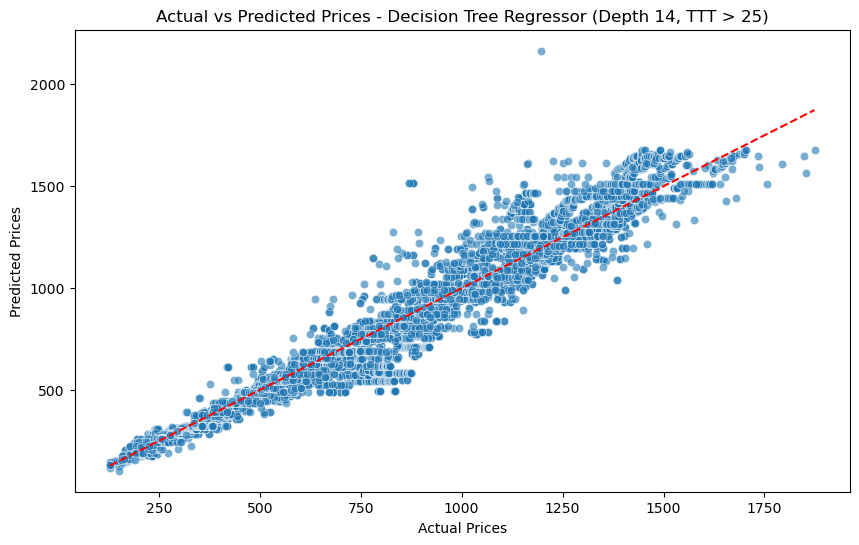

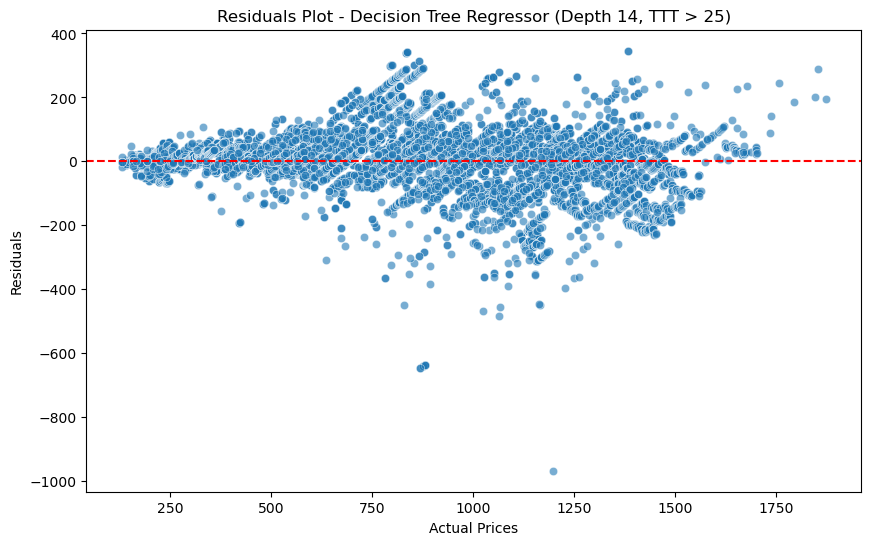

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


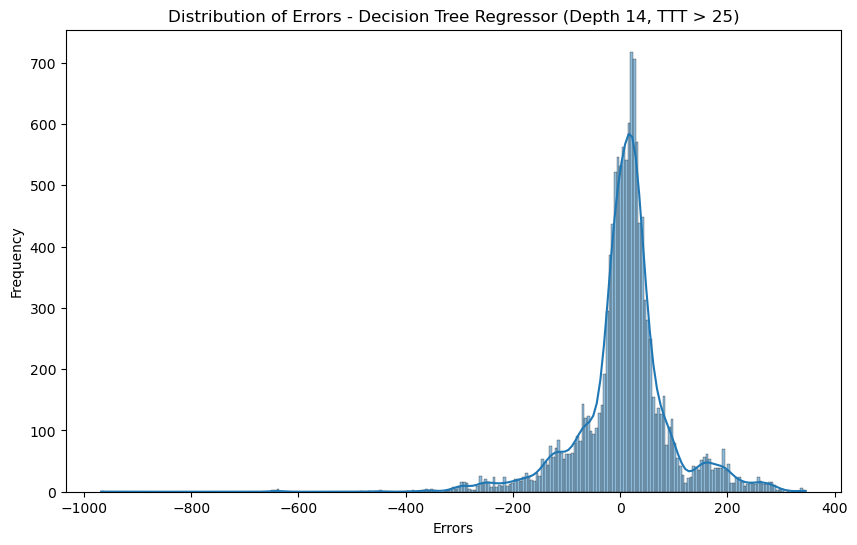

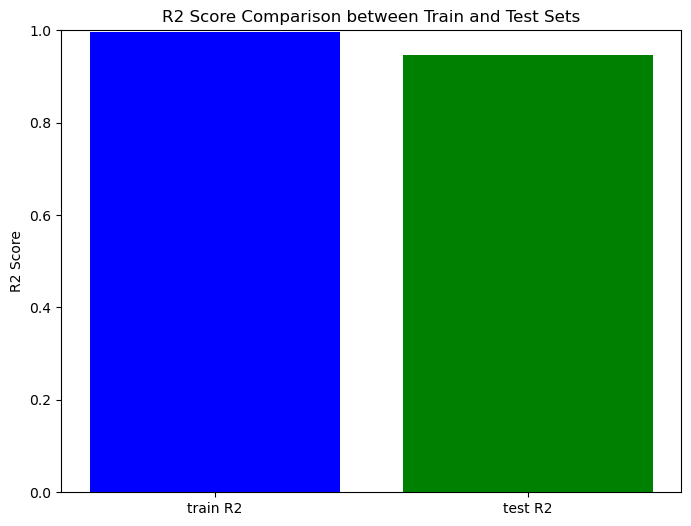

In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df2 = pd.read_csv('./25_06_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)


# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


# Additional experiment for depth 14
df_train = df[df['TTT'] <= 25]
df_test = df[df['TTT'] > 25]

X_train_exp = df_train.drop(columns=['price'])
y_train_exp = df_train['price']
X_test_exp = df_test.drop(columns=['price'])
y_test_exp = df_test['price']

# Train the model on the new train-test split
model_exp = DecisionTreeRegressor(max_depth=14)
model_exp.fit(X_train_exp, y_train_exp)

# Predictions
y_train_exp_pred = model_exp.predict(X_train_exp)
y_test_exp_pred = model_exp.predict(X_test_exp)

# Calculate error metrics for training set
train_r2_exp = r2_score(y_train_exp, y_train_exp_pred)
train_rmse_exp = mean_squared_error(y_train_exp, y_train_exp_pred, squared=False)
train_mse_exp = mean_squared_error(y_train_exp, y_train_exp_pred)
train_mae_exp = mean_absolute_error(y_train_exp, y_train_exp_pred)

# Calculate error metrics for test set
test_r2_exp = r2_score(y_test_exp, y_test_exp_pred)
test_rmse_exp = mean_squared_error(y_test_exp, y_test_exp_pred, squared=False)
test_mse_exp = mean_squared_error(y_test_exp, y_test_exp_pred)
test_mae_exp = mean_absolute_error(y_test_exp, y_test_exp_pred)

# Print error metrics
print("Error metrics for the additional experiment (Depth 14, TTT split):")
print(f"Training set - R²: {train_r2_exp}, RMSE: {train_rmse_exp}, MSE: {train_mse_exp}, MAE: {train_mae_exp}")
print(f"Test set - R²: {test_r2_exp}, RMSE: {test_rmse_exp}, MSE: {test_mse_exp}, MAE: {test_mae_exp}")

# Plot actual vs predicted prices for depth 14 with new split
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=y_test_exp_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=residuals_exp, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.show()

# Plot  error distribution for depth 14 with new split
errors_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors_exp, kde=True)
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Errors - Decision Tree Regressor (Depth 14, TTT > 25)')
plt.show()


r2_values = [train_r2_exp, test_r2_exp]
labels = ['train R2', 'test R2']

plt.figure(figsize=(8, 6))
plt.bar(labels, r2_values, color=['blue', 'green'])
plt.ylim(0, 1)  
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison between Train and Test Sets')
plt.show()


Error metrics for the additional experiment (Depth 12, TTT split):
Training set - R²: 0.9927342431330607, RMSE: 35.33989641444981, MSE: 1248.9082785840428, MAE: 21.40619859152463
Test set - R²: 0.9535341735302777, RMSE: 81.71666820792245, MSE: 6677.613863003684, MAE: 55.04587757866588


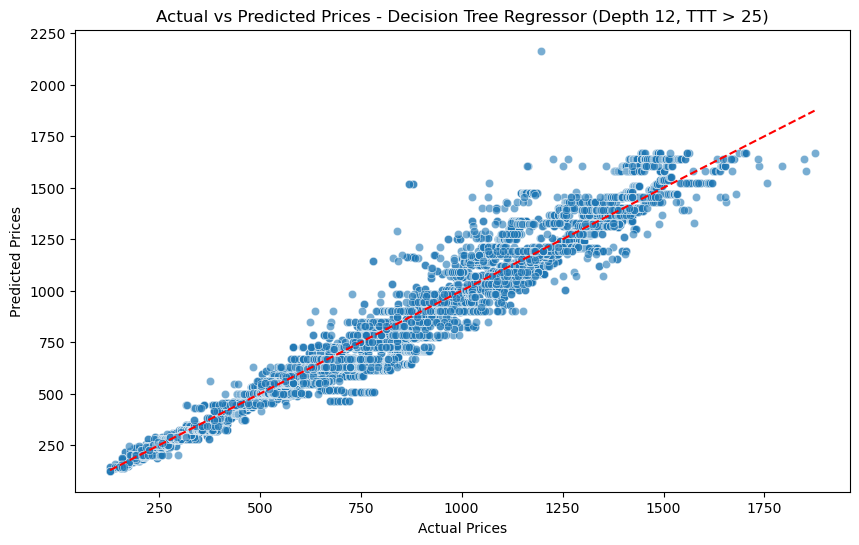

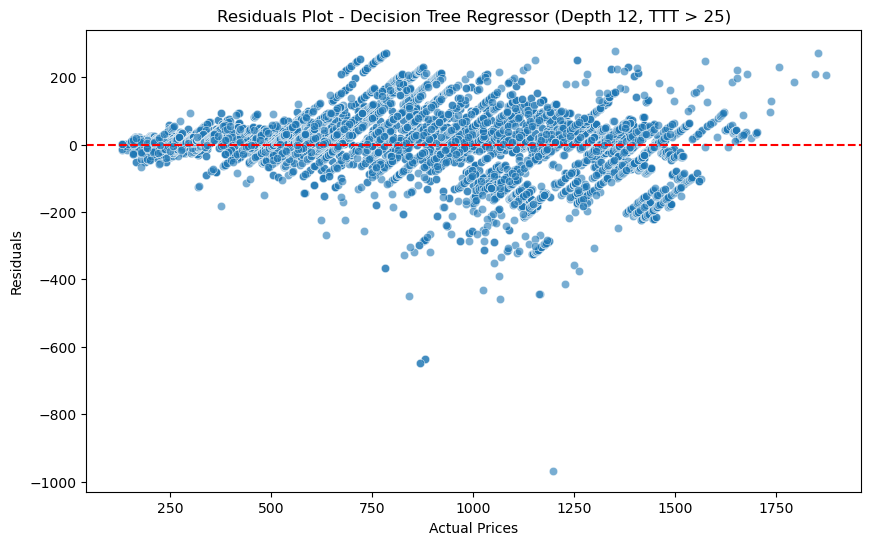

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


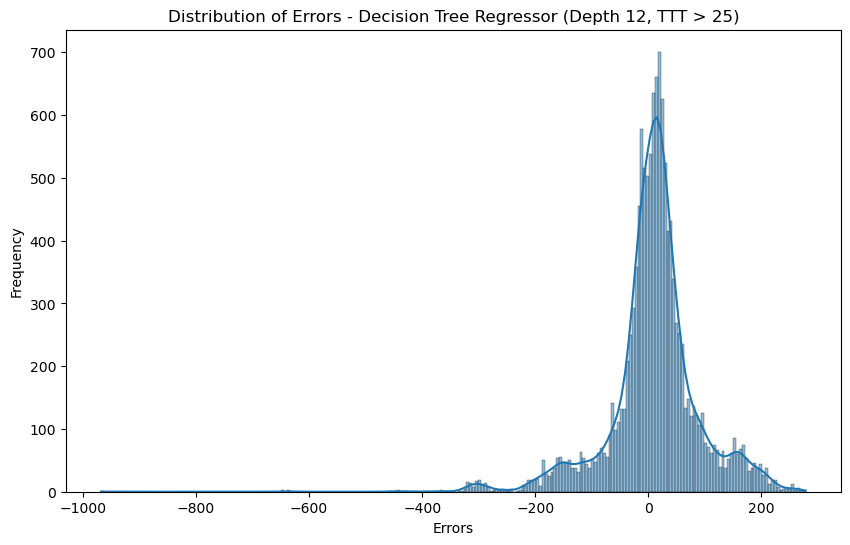

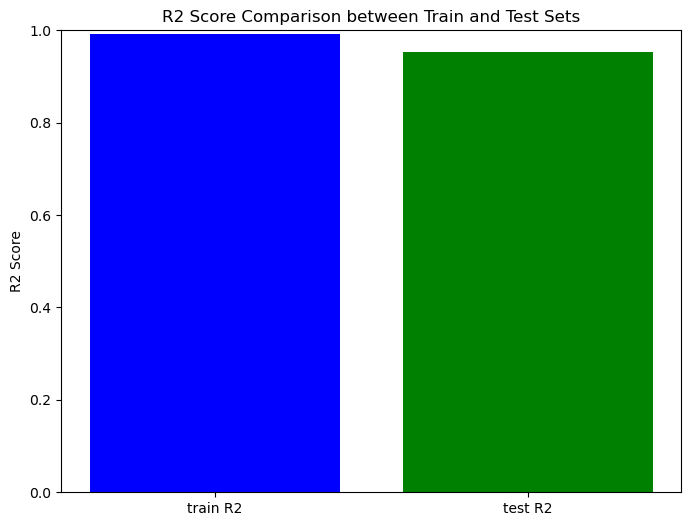

In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df2 = pd.read_csv('./25_06_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)


# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


# Additional experiment for depth 14
df_train = df[df['TTT'] <= 25]
df_test = df[df['TTT'] > 25]

X_train_exp = df_train.drop(columns=['price'])
y_train_exp = df_train['price']
X_test_exp = df_test.drop(columns=['price'])
y_test_exp = df_test['price']

# Train the model on the new train-test split
model_exp = DecisionTreeRegressor(max_depth=12)
model_exp.fit(X_train_exp, y_train_exp)

# Predictions
y_train_exp_pred = model_exp.predict(X_train_exp)
y_test_exp_pred = model_exp.predict(X_test_exp)

# Calculate error metrics for training set
train_r2_exp = r2_score(y_train_exp, y_train_exp_pred)
train_rmse_exp = mean_squared_error(y_train_exp, y_train_exp_pred, squared=False)
train_mse_exp = mean_squared_error(y_train_exp, y_train_exp_pred)
train_mae_exp = mean_absolute_error(y_train_exp, y_train_exp_pred)

# Calculate error metrics for test set
test_r2_exp = r2_score(y_test_exp, y_test_exp_pred)
test_rmse_exp = mean_squared_error(y_test_exp, y_test_exp_pred, squared=False)
test_mse_exp = mean_squared_error(y_test_exp, y_test_exp_pred)
test_mae_exp = mean_absolute_error(y_test_exp, y_test_exp_pred)

# Print error metrics
print("Error metrics for the additional experiment (Depth 12, TTT split):")
print(f"Training set - R²: {train_r2_exp}, RMSE: {train_rmse_exp}, MSE: {train_mse_exp}, MAE: {train_mae_exp}")
print(f"Test set - R²: {test_r2_exp}, RMSE: {test_rmse_exp}, MSE: {test_mse_exp}, MAE: {test_mae_exp}")

# Plot actual vs predicted prices for depth 14 with new split
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=y_test_exp_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Decision Tree Regressor (Depth 12, TTT > 25)')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=residuals_exp, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Decision Tree Regressor (Depth 12, TTT > 25)')
plt.show()

# Plot  error distribution for depth 14 with new split
errors_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors_exp, kde=True)
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Errors - Decision Tree Regressor (Depth 12, TTT > 25)')
plt.show()


r2_values = [train_r2_exp, test_r2_exp]
labels = ['train R2', 'test R2']

plt.figure(figsize=(8, 6))
plt.bar(labels, r2_values, color=['blue', 'green'])
plt.ylim(0, 1)  
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison between Train and Test Sets')
plt.show()


Error metrics for the additional experiment (Depth 10, TTT split):
Training set - R²: 0.9837220315526531, RMSE: 52.896257110105026, MSE: 2798.014016258336, MAE: 34.531693000057786
Test set - R²: 0.9610108021695378, RMSE: 74.85416462484231, MSE: 5603.145961682995, MAE: 53.93514852499581


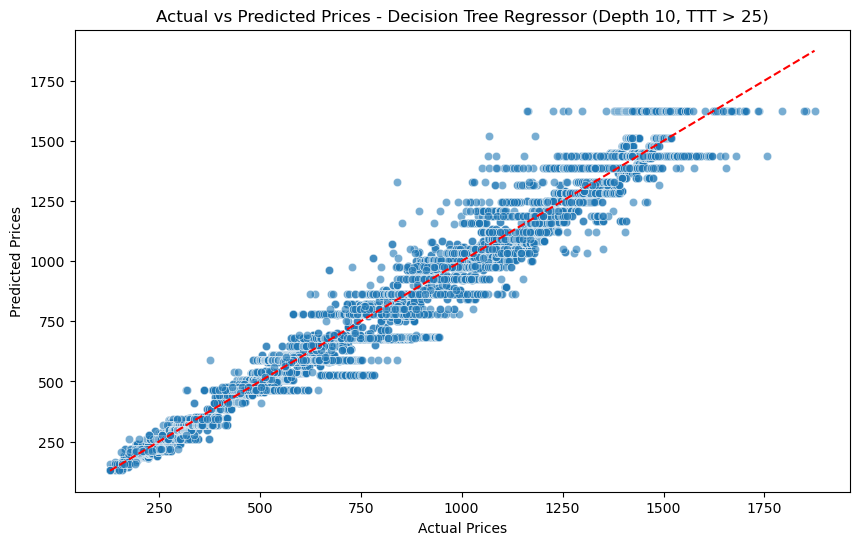

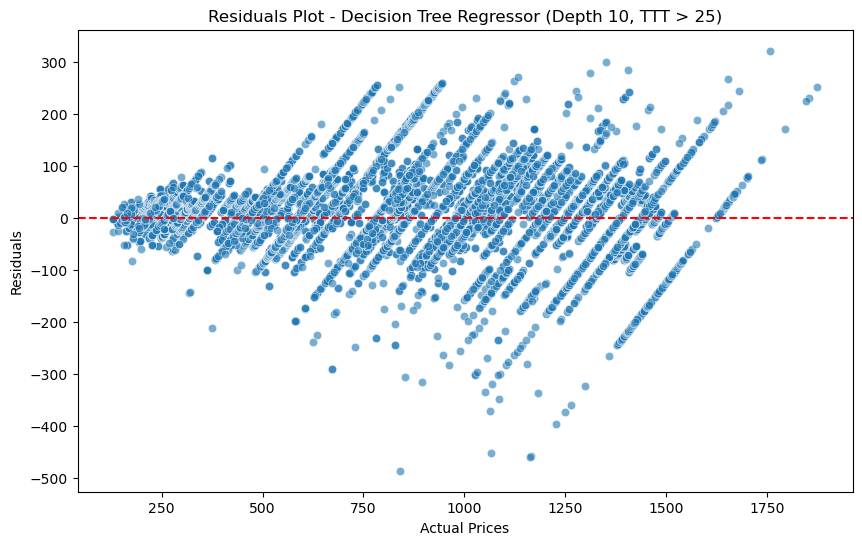

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


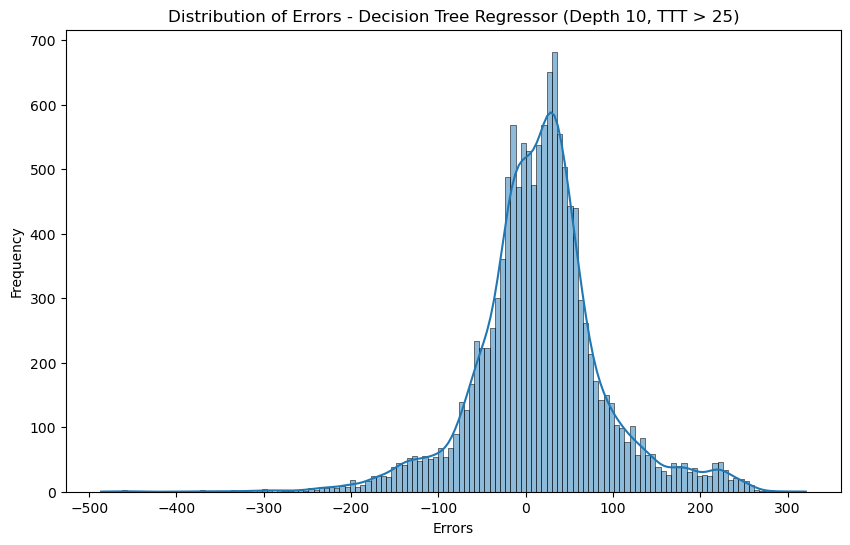

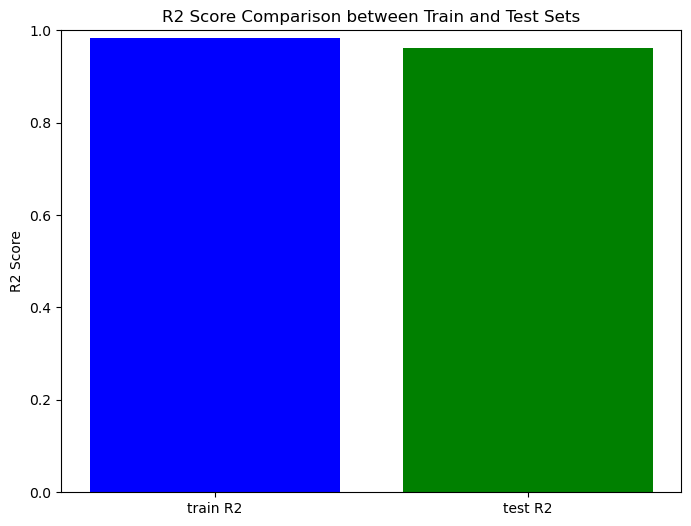

In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df2 = pd.read_csv('./25_06_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)


# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


# Additional experiment for depth 14
df_train = df[df['TTT'] <= 25]
df_test = df[df['TTT'] > 25]

X_train_exp = df_train.drop(columns=['price'])
y_train_exp = df_train['price']
X_test_exp = df_test.drop(columns=['price'])
y_test_exp = df_test['price']

# Train the model on the new train-test split
model_exp = DecisionTreeRegressor(max_depth=10)
model_exp.fit(X_train_exp, y_train_exp)

# Predictions
y_train_exp_pred = model_exp.predict(X_train_exp)
y_test_exp_pred = model_exp.predict(X_test_exp)

# Calculate error metrics for training set
train_r2_exp = r2_score(y_train_exp, y_train_exp_pred)
train_rmse_exp = mean_squared_error(y_train_exp, y_train_exp_pred, squared=False)
train_mse_exp = mean_squared_error(y_train_exp, y_train_exp_pred)
train_mae_exp = mean_absolute_error(y_train_exp, y_train_exp_pred)

# Calculate error metrics for test set
test_r2_exp = r2_score(y_test_exp, y_test_exp_pred)
test_rmse_exp = mean_squared_error(y_test_exp, y_test_exp_pred, squared=False)
test_mse_exp = mean_squared_error(y_test_exp, y_test_exp_pred)
test_mae_exp = mean_absolute_error(y_test_exp, y_test_exp_pred)

# Print error metrics
print("Error metrics for the additional experiment (Depth 10, TTT split):")
print(f"Training set - R²: {train_r2_exp}, RMSE: {train_rmse_exp}, MSE: {train_mse_exp}, MAE: {train_mae_exp}")
print(f"Test set - R²: {test_r2_exp}, RMSE: {test_rmse_exp}, MSE: {test_mse_exp}, MAE: {test_mae_exp}")

# Plot actual vs predicted prices for depth 14 with new split
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=y_test_exp_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Decision Tree Regressor (Depth 10, TTT > 25)')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=residuals_exp, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Decision Tree Regressor (Depth 10, TTT > 25)')
plt.show()

# Plot  error distribution for depth 14 with new split
errors_exp = y_test_exp - y_test_exp_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors_exp, kde=True)
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Errors - Decision Tree Regressor (Depth 10, TTT > 25)')
plt.show()


r2_values = [train_r2_exp, test_r2_exp]
labels = ['train R2', 'test R2']

plt.figure(figsize=(8, 6))
plt.bar(labels, r2_values, color=['blue', 'green'])
plt.ylim(0, 1) 
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison between Train and Test Sets')
plt.show()


### Conclusions regarding the different division into training and test groups:
There seems to be more of a tendency to overfit in this distribution, and it also makes sense that the model would have more difficulty predicting prices accurately in such a distribution for the reason that it does not have rows with a TTT higher than 25.
It is very possible that the tree at depth 10 would be more suitable for this situation considering the fact that it produces relatively similar performance to the tree at depth 14 (slightly less good) but the average absolute value error at depth 14 in the test group is almost 5 times higher than the average error in the training group,
The average absolute value error at depth 12 is more than 3 times higher than in the training group
Whereas in the tree with a depth of 10, the average error is less than 2 times higher than the average error in absolute value in the training group, i.e. less overtraining.
You can also see this in the graphs of the R2 for each code section and understand that there is a clear decrease in overtraining as the tree is at a shallower depthdepth